In [17]:
#Load libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import numpy as np
from collections import defaultdict
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import ShuffleSplit,train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
%matplotlib inline


In [21]:
data = pd.read_csv('credit_data.csv',delimiter=";")

In [22]:
data.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_Account,Present_Employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors,...,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_People_being_liable_to_provide_maintenance_for,Telephone,Foreign_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status_of_existing_checking_account                       1000 non-null   object
 1   Duration_in_month                                         1000 non-null   int64 
 2   Credit_history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit_amount                                             1000 non-null   int64 
 5   Savings_Account                                           1000 non-null   object
 6   Present_Employment_since                                  1000 non-null   object
 7   Installment_rate_in_percentage_of_disposable_income       1000 non-null   int64 
 8   Personal_status_and_sex      

In [24]:
print(data.columns)

Index(['Status_of_existing_checking_account', 'Duration_in_month',
       'Credit_history', 'Purpose', 'Credit_amount', 'Savings_Account',
       'Present_Employment_since',
       'Installment_rate_in_percentage_of_disposable_income',
       'Personal_status_and_sex', 'Other_debtors', 'Present_residence_since',
       'Property', 'Age_in_years', 'Other_installment_plans', 'Housing',
       'Number_of_existing_credits_at_this_bank', 'Job',
       'Number_of_People_being_liable_to_provide_maintenance_for', 'Telephone',
       'Foreign_worker', 'class'],
      dtype='object')


In [25]:
data['class'].value_counts()

1    700
2    300
Name: class, dtype: int64

In [26]:




#numerical variables labels
numvars = ['Credit_amount', 'Duration_in_month', 'Installment_rate_in_percentage_of_disposable_income', 'Present_residence_since', 'Age_in_years', 
           'Number_of_existing_credits_at_this_bank', 'Number_of_People_being_liable_to_provide_maintenance_for', 'class']

# Standardization
numdata_std = pd.DataFrame(StandardScaler().fit_transform(data[numvars].drop(['class'], axis=1)))

#categorical variables labels
catvars = ['Status_of_existing_checking_account', 'Credit_history', 'Purpose', 'Savings_Account', 'Present_Employment_since',
           'Personal_status_and_sex', 'Other_debtors', 'Property', 'Other_installment_plans', 'Housing', 'Job', 
           'Telephone', 'Foreign_worker']

d = defaultdict(LabelEncoder)

# Encoding the variable
lecatdata = data[catvars].apply(lambda x: d[x.name].fit_transform(x))

# print transformations
for x in range(len(catvars)):
    print(catvars[x],": ", data[catvars[x]].unique())
    print(catvars[x],": ", lecatdata[catvars[x]].unique())
    
dummyvars = pd.get_dummies(data[catvars])

data_clean = pd.concat([data[numvars], dummyvars], axis = 1)

print(data_clean.shape)

Status_of_existing_checking_account :  ['A11' 'A12' 'A14' 'A13']
Status_of_existing_checking_account :  [0 1 3 2]
Credit_history :  ['A34' 'A32' 'A33' 'A30' 'A31']
Credit_history :  [4 2 3 0 1]
Purpose :  ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
Purpose :  [4 7 3 0 1 9 5 6 2 8]
Savings_Account :  ['A65' 'A61' 'A63' 'A64' 'A62']
Savings_Account :  [4 0 2 3 1]
Present_Employment_since :  ['A75' 'A73' 'A74' 'A71' 'A72']
Present_Employment_since :  [4 2 3 0 1]
Personal_status_and_sex :  ['A93' 'A92' 'A91' 'A94']
Personal_status_and_sex :  [2 1 0 3]
Other_debtors :  ['A101' 'A103' 'A102']
Other_debtors :  [0 2 1]
Property :  ['A121' 'A122' 'A124' 'A123']
Property :  [0 1 3 2]
Other_installment_plans :  ['A143' 'A141' 'A142']
Other_installment_plans :  [2 0 1]
Housing :  ['A152' 'A153' 'A151']
Housing :  [1 2 0]
Job :  ['A173' 'A172' 'A174' 'A171']
Job :  [2 1 3 0]
Telephone :  ['A192' 'A191']
Telephone :  [1 0]
Foreign_worker :  ['A201' 'A202']
Foreign_worker :  [0 1]


In [27]:
#from sklearn.mixture import GaussianMixture as GMM
#housingMap = {'A151':'rent','A152':'own','A153' :'for free' };
#df['Housing'] =df['Housing'].apply(lambda x: housingMap[x])


In [28]:
data.head(10)

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_Account,Present_Employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors,...,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_People_being_liable_to_provide_maintenance_for,Telephone,Foreign_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


In [29]:
# We binarize the y output So we represent good and bad in [0,1] instead of [1,2]
#ROC curves -> 0 = 'bad' credit; 1 = 'good' credit
data_clean['class'].replace([1,2], [1,0], inplace=True)
# Print number of 'good' credits (should be 700) and 'bad credits (should be 300)
data_clean['class'].value_counts()



# Unscaled, unnormalized data
X_clean = data_clean.drop('class', axis=1)
y_clean = data_clean['class']
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean,y_clean,test_size=0.2, random_state=1)
data.head(10)


,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_Account,Present_Employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors,...,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_People_being_liable_to_provide_maintenance_for,Telephone,Foreign_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


Exploratory data analysis


<Figure size 432x288 with 0 Axes>

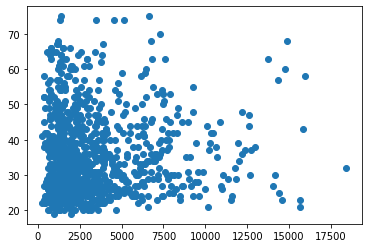

<Figure size 432x288 with 0 Axes>

In [30]:
plt.scatter(data['Credit_amount'],data["Age_in_years"])
plt.figure()

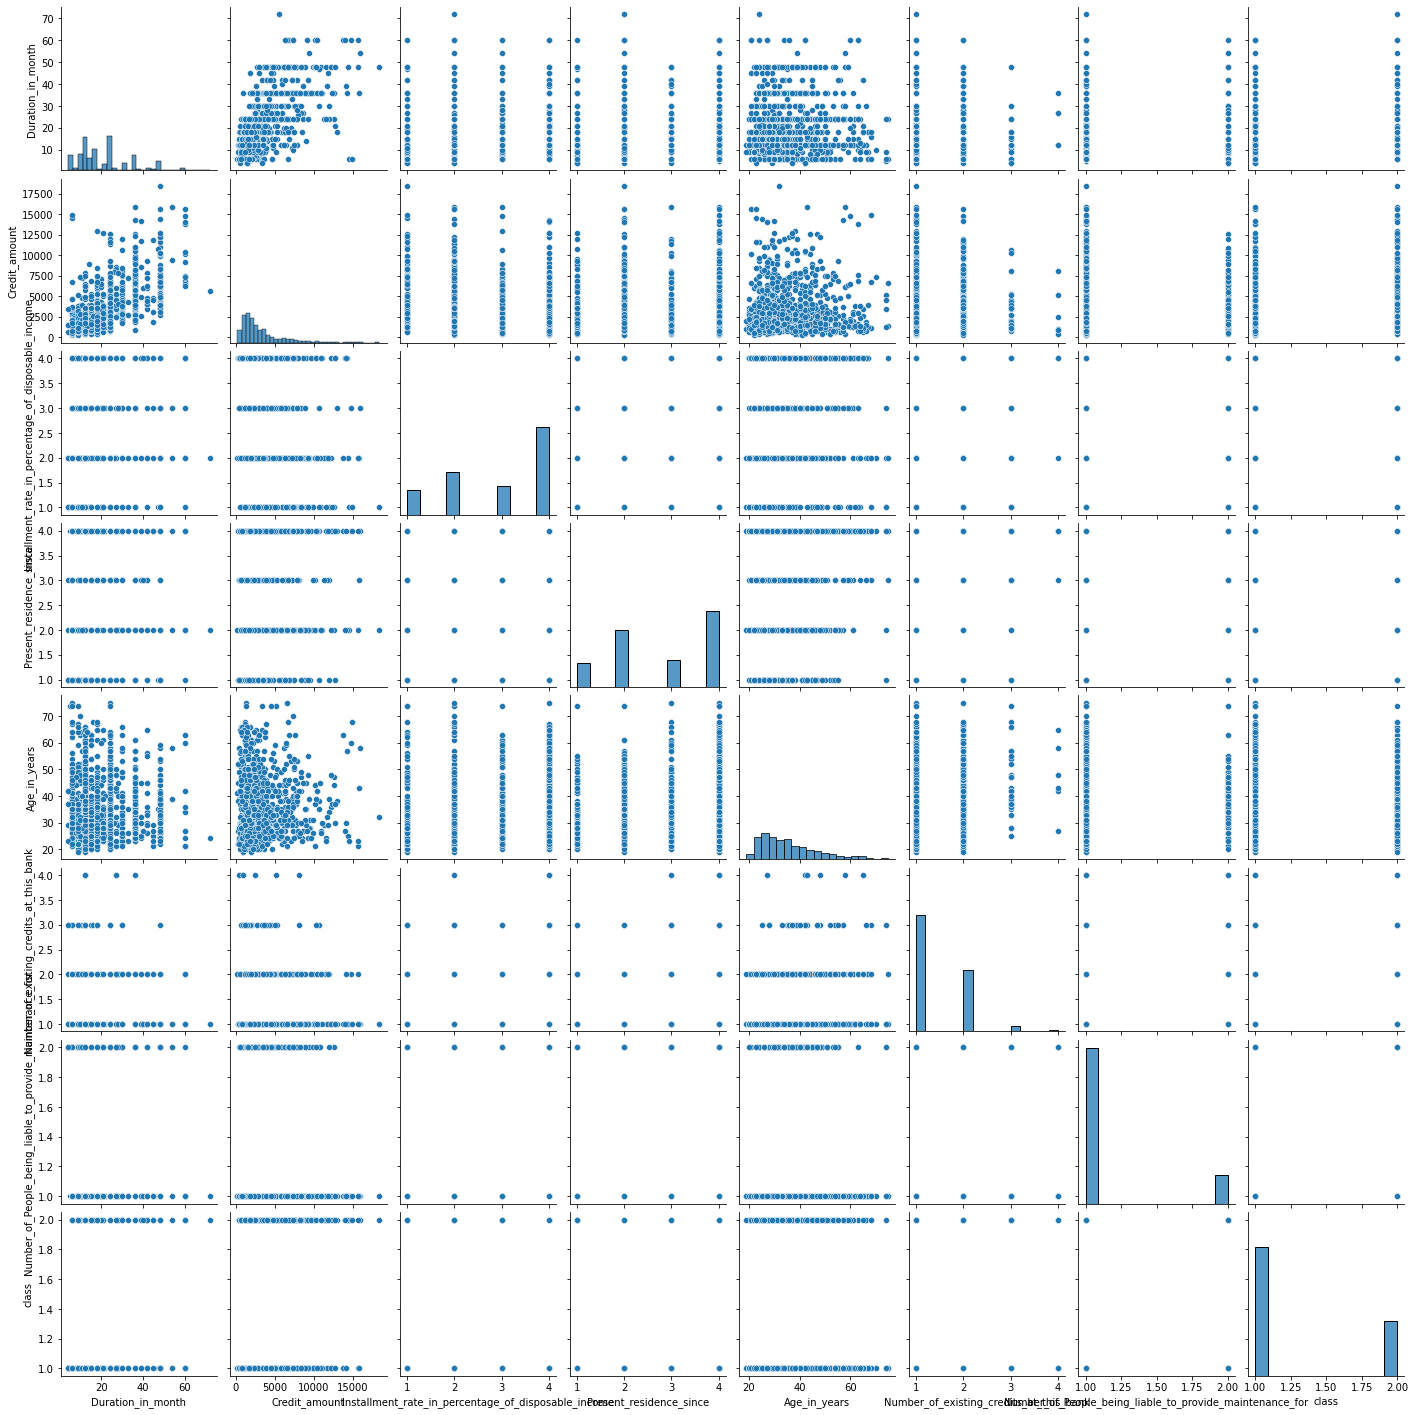

In [31]:
sns.pairplot(data)

<Figure size 432x288 with 0 Axes>

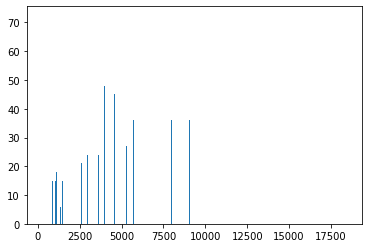

<Figure size 432x288 with 0 Axes>

In [32]:
plt.bar(data['Credit_amount'],data['Duration_in_month'])
plt.figure()

Text(3, -100, 'Highly Skilled')

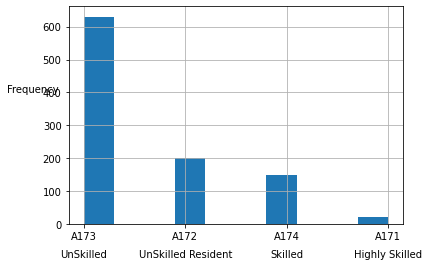

In [33]:
fig = data["Job"].hist()
fig.text(-0.5, 400, 'Frequency', ha='center')
fig.text(0, -100, 'UnSkilled', ha='center')
fig.text(1, -100, 'UnSkilled Resident', ha='center')
fig.text(2, -100, 'Skilled', ha='center')
fig.text(3, -100, 'Highly Skilled', ha='center')

Text(0, 40, 'Frequency')

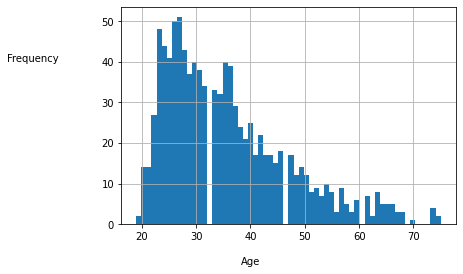

In [34]:
fig = data.Age_in_years.hist(bins=60)
fig.text(40, -10, 'Age', ha='center')
fig.text(0, 40, 'Frequency', ha='center')

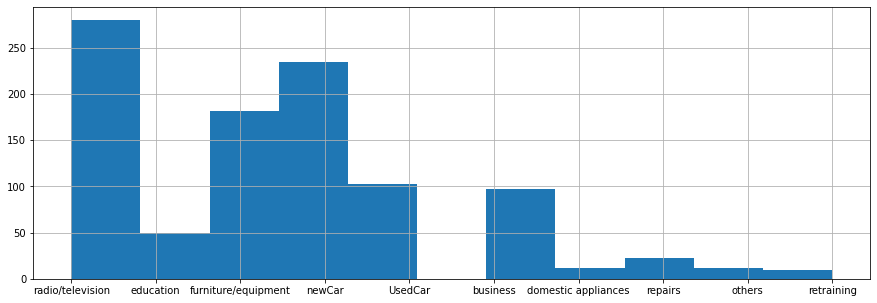

In [35]:
# A40, A43 AND A49 - significant values 
dict_values = {"A40": "newCar", 
	    "A41" : "UsedCar",
	    "A42" : "furniture/equipment",
	    "A43" : "radio/television" ,
	    "A44" : "domestic appliances",
	    "A45" : "repairs",
	    "A46" : "education",
	    "A47" : "vacation",
	    "A48" : "retraining",
	    "A49" : "business",
	    "A410" : "others" }
data['Purpose'] = data['Purpose'].map(dict_values).fillna(data['Purpose'])

plt.figure(figsize=(15,5))
fig = data["Purpose"].hist(bins=11)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


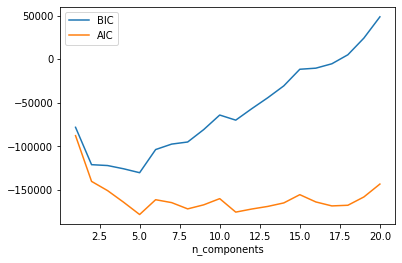

In [36]:
from sklearn.mixture import GaussianMixture as GMM

n_components = np.arange(1,21)
#Xnew = X[:]
models = [GMM(n,covariance_type ='full', random_state=0).fit(X_clean) for n in n_components]
plt.plot(n_components,[m.bic(X_clean) for m in models], label='BIC')
plt.plot(n_components,[m.aic(X_clean) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');
#plt.scatter(Xnew[:, 0], Xnew[:, 1]);
print(n_components)


In [37]:
from matplotlib.patches import Ellipse
import numpy as np
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

[[ 6 67]
 [48 22]
 [12 49]
 ...
 [12 38]
 [45 23]
 [45 27]]


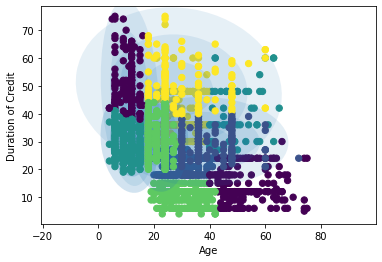

In [38]:

f1 = data['Duration_in_month'].values
f2 = data['Age_in_years'].values
X = np.array(list(zip(f1, f2)))
print(X)

n_components = np.arange(1,21)
gmm = GMM(n_components=5, covariance_type='full',verbose=0,verbose_interval=10,max_iter=5000).fit(X)
labels = gmm.predict(X)
plt.xlabel('Age')
plt.ylabel('Duration of Credit')
plt.scatter(X[:,1],X[:, 0], c=labels, s= 40, cmap='viridis')
plot_gmm(gmm,X)

In [39]:
import statsmodels.api as sm
XX = data['Age_in_years']
yy = data['Duration_in_month']

# Note the difference in argument order
model = sm.OLS(yy, XX).fit()
predictions = model.predict(XX) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Duration_in_month   R-squared (uncentered):                   0.672
Model:                            OLS   Adj. R-squared (uncentered):              0.671
Method:                 Least Squares   F-statistic:                              2045.
Date:                Fri, 30 Dec 2022   Prob (F-statistic):                   6.47e-244
Time:                        20:03:20   Log-Likelihood:                         -4045.3
No. Observations:                1000   AIC:                                      8093.
Df Residuals:                     999   BIC:                                      8098.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Age_in_years     0.5299      0.012     45.219      0.000       0.507       0.553
==============================================================================
Omnibus:                       56.615   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.955
Skew:                           0.566   Prob(JB):                     2.89e-15
Kurtosis:                       3.572   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Age_in_years', ylabel='Duration_in_month'>

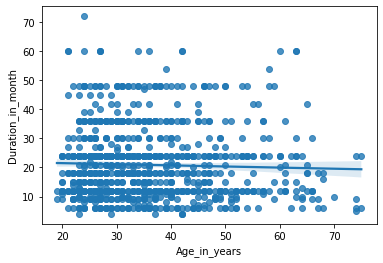

In [43]:
sns.regplot(x=data['Age_in_years'],y=data['Duration_in_month'],data=data)

In [44]:

from sklearn.metrics import silhouette_score
gmm_silhoute_score = silhouette_score(X, labels, metric='euclidean')
print(gmm_silhoute_score)

0.3516245215498491


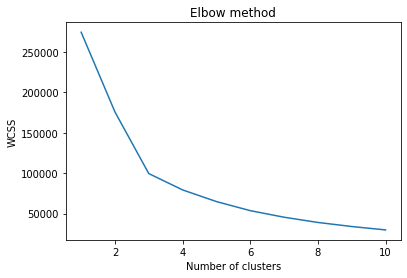

In [45]:
from sklearn.cluster import KMeans

wcss = []  # find cluster sum of squares to append to wcss
 # 10 iterations for finding k , 11 is exclusive in range
for i in range(1, 11 ):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0 ) 
    # n_init -> no of times k means run with diff init
    # random_state fixes all factors on k means process
    #to fit kmeans to our dataset
    kmeans.fit(X) #fit is method to fit  kmeans to data
    wcss.append(kmeans.inertia_)   # intertia to compute cluster sum of squares
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [46]:
#applying PCA for dimesnionalioty reduction
#from sklearn.decomposition import PCA
#pca = PCA(n_components = 2)


f1 = data['Age_in_years'].values
f2 = data['Duration_in_month'].values
X = np.array(list(zip(f1, f2)))
#X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300,n_init = 10 , random_state = 0)
kmeans.fit_predict(X)



array([4, 0, 1, 0, 4, 0, 4, 0, 4, 3, 2, 0, 2, 4, 2, 3, 4, 3, 1, 3, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 3, 2, 4, 2, 0, 0, 1, 1, 2, 3, 2, 1, 3,
       0, 1, 0, 2, 1, 2, 3, 3, 2, 2, 4, 2, 4, 3, 2, 3, 2, 1, 4, 0, 3, 4,
       2, 2, 0, 3, 3, 1, 1, 0, 0, 4, 0, 1, 0, 3, 1, 1, 2, 4, 4, 2, 2, 0,
       2, 2, 4, 4, 2, 3, 4, 0, 4, 1, 0, 1, 1, 3, 2, 1, 2, 3, 1, 2, 3, 1,
       2, 2, 2, 3, 1, 0, 0, 2, 3, 1, 3, 1, 2, 4, 2, 2, 1, 2, 2, 2, 0, 3,
       2, 1, 0, 1, 3, 4, 1, 1, 2, 3, 3, 2, 3, 0, 1, 4, 3, 1, 1, 1, 3, 3,
       3, 2, 1, 1, 3, 2, 3, 2, 1, 4, 0, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 4,
       1, 1, 2, 4, 3, 3, 1, 4, 1, 2, 4, 4, 2, 2, 4, 0, 3, 2, 0, 2, 2, 2,
       3, 1, 4, 2, 3, 2, 1, 3, 1, 2, 3, 4, 2, 0, 4, 4, 0, 1, 2, 3, 3, 4,
       2, 2, 2, 3, 2, 3, 0, 4, 2, 3, 3, 1, 1, 2, 1, 3, 2, 4, 1, 3, 3, 1,
       0, 2, 1, 3, 4, 1, 3, 2, 1, 1, 3, 3, 2, 0, 3, 2, 2, 4, 2, 4, 1, 4,
       2, 1, 0, 3, 1, 3, 2, 1, 0, 0, 3, 2, 2, 1, 2, 3, 2, 1, 1, 4, 3, 0,
       0, 0, 1, 4, 2, 3, 1, 0, 0, 0, 2, 1, 1, 3, 4,

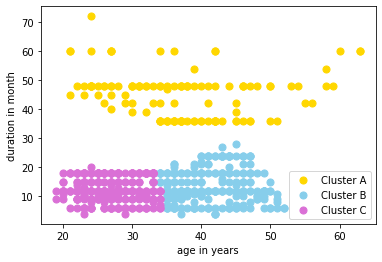

Silhouette Score: 0.3516245215498491


In [47]:
y_kmeans = kmeans.fit_predict(X)
from sklearn import metrics
# Scatter chart of the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'gold', label = 'Cluster A')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'skyblue', label = 'Cluster B')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'orchid', label = 'Cluster C')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'mediumspringgreen', label = 'Cluster D')
plt.legend()
plt.xlabel('age in years')
plt.ylabel('duration in month')
plt.show()

kmeans.inertia_
print ('Silhouette Score:', metrics.silhouette_score(X, labels, metric='euclidean'))

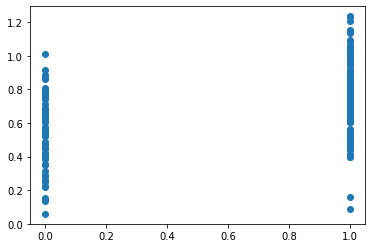

In [48]:
from sklearn.linear_model import LinearRegression
linearregressor = LinearRegression()
linearregressor.fit(X_train_clean, y_train_clean)
ypred_linreg = linearregressor.predict(X_test_clean)
plt.scatter(y_test_clean,ypred_linreg)

In [49]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test_clean,ypred_linreg))
print('MSE:', metrics.mean_squared_error(y_test_clean,ypred_linreg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_clean,ypred_linreg)))

MAE: 0.3384738293002823
MSE: 0.16531024225145544
RMSE: 0.4065836227044265


LogisticRegression
LogisticRegression() 

MAE: 0.30452940067963985
MSE: 0.16441701831851707
RMSE: 0.4054836844048316
Cross Validation Accuracy: 0.73 (+/- 0.00)
Cross Validation Precision: 0.77 (+/- 0.00)
Cross Validation Recall: 0.88 (+/- 0.01)
Cross Validation roc_auc: 0.67 (+/- 0.03)


c:\Users\chema\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\chema\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

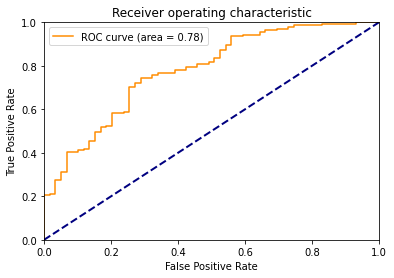

In [50]:
from sklearn.linear_model import LogisticRegression

# Function for evaluation reports
def get_eval(clf, X,y):
    # Cross Validation to test and anticipate overfitting problem
    scores1 = cross_val_score(clf, X, y, cv=2, scoring='accuracy')
    scores2 = cross_val_score(clf, X, y, cv=2, scoring='precision')
    scores3 = cross_val_score(clf, X, y, cv=2, scoring='recall')
    scores4 = cross_val_score(clf, X, y, cv=2, scoring='roc_auc')
    
    # The mean score and standard deviation of the score estimate
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std()))
    print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std()))
    print("Cross Validation Recall: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std()))
    print("Cross Validation roc_auc: %0.2f (+/- %0.2f)" % (scores4.mean(), scores4.std()))
    
    
# Function to get roc curve
def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="upper left")
    plt.show()
    return


# fit, train and cross validate Decision Tree with training and test data 
def logregclf(X_train, y_train,X_test, y_test):
    print("LogisticRegression")
    model = LogisticRegression().fit(X_train, y_train)
    print(model,'\n')

    # Predict target variables y for test data
    y_pred = model.predict_proba(X_test)[:,1]
    print('MAE:', metrics.mean_absolute_error(y_test_clean,y_pred))
    print('MSE:', metrics.mean_squared_error(y_test_clean,y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_clean,y_pred)))
    # Get Cross Validation and Confusion matrix
    get_eval(model, X_test, y_test)
    get_roc (y_test,y_pred)
    return

# Logistic Regression
logregclf(X_train_clean, y_train_clean, X_test_clean, y_test_clean)
# logregclf(X_train_clean_res, y_train_clean_res,X_test_clean, y_test_clean)


In [51]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_clean, y_train_clean)

GaussianNB()

In [52]:
# Predicting the Test set results
y_pred = classifier.predict(X_test_clean)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_clean, y_pred)
cm

array([[ 37,  22],
       [ 34, 107]], dtype=int64)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test_clean,y_pred))


              precision    recall  f1-score   support

           0       0.52      0.63      0.57        59
           1       0.83      0.76      0.79       141

    accuracy                           0.72       200
   macro avg       0.68      0.69      0.68       200
weighted avg       0.74      0.72      0.73       200



In [54]:
from sklearn.metrics import accuracy_score 
print('MAE:', metrics.mean_absolute_error(y_test_clean,y_pred))
print('MSE:', metrics.mean_squared_error(y_test_clean,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_clean,y_pred)))

print ("Accuracy : ", accuracy_score(y_test_clean,y_pred)*100)

MAE: 0.28
MSE: 0.28
RMSE: 0.5291502622129182
Accuracy :  72.0


In [55]:
from sklearn.tree import DecisionTreeClassifier 
# fit, train and cross validate Decision Tree with training and test data 
decclassifier = DecisionTreeClassifier(criterion ='entropy')
decclassifier.fit(X_train_clean, y_train_clean)
y_pred = decclassifier.predict(X_test_clean)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_clean, y_pred) 


array([[ 23,  36],
       [ 37, 104]], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test_clean,y_pred)*100)
print('MAE:', metrics.mean_absolute_error(y_test_clean,y_pred))
print('MSE:', metrics.mean_squared_error(y_test_clean,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_clean,y_pred)))

Accuracy :  63.5
MAE: 0.365
MSE: 0.365
RMSE: 0.6041522986797286


In [57]:

from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 


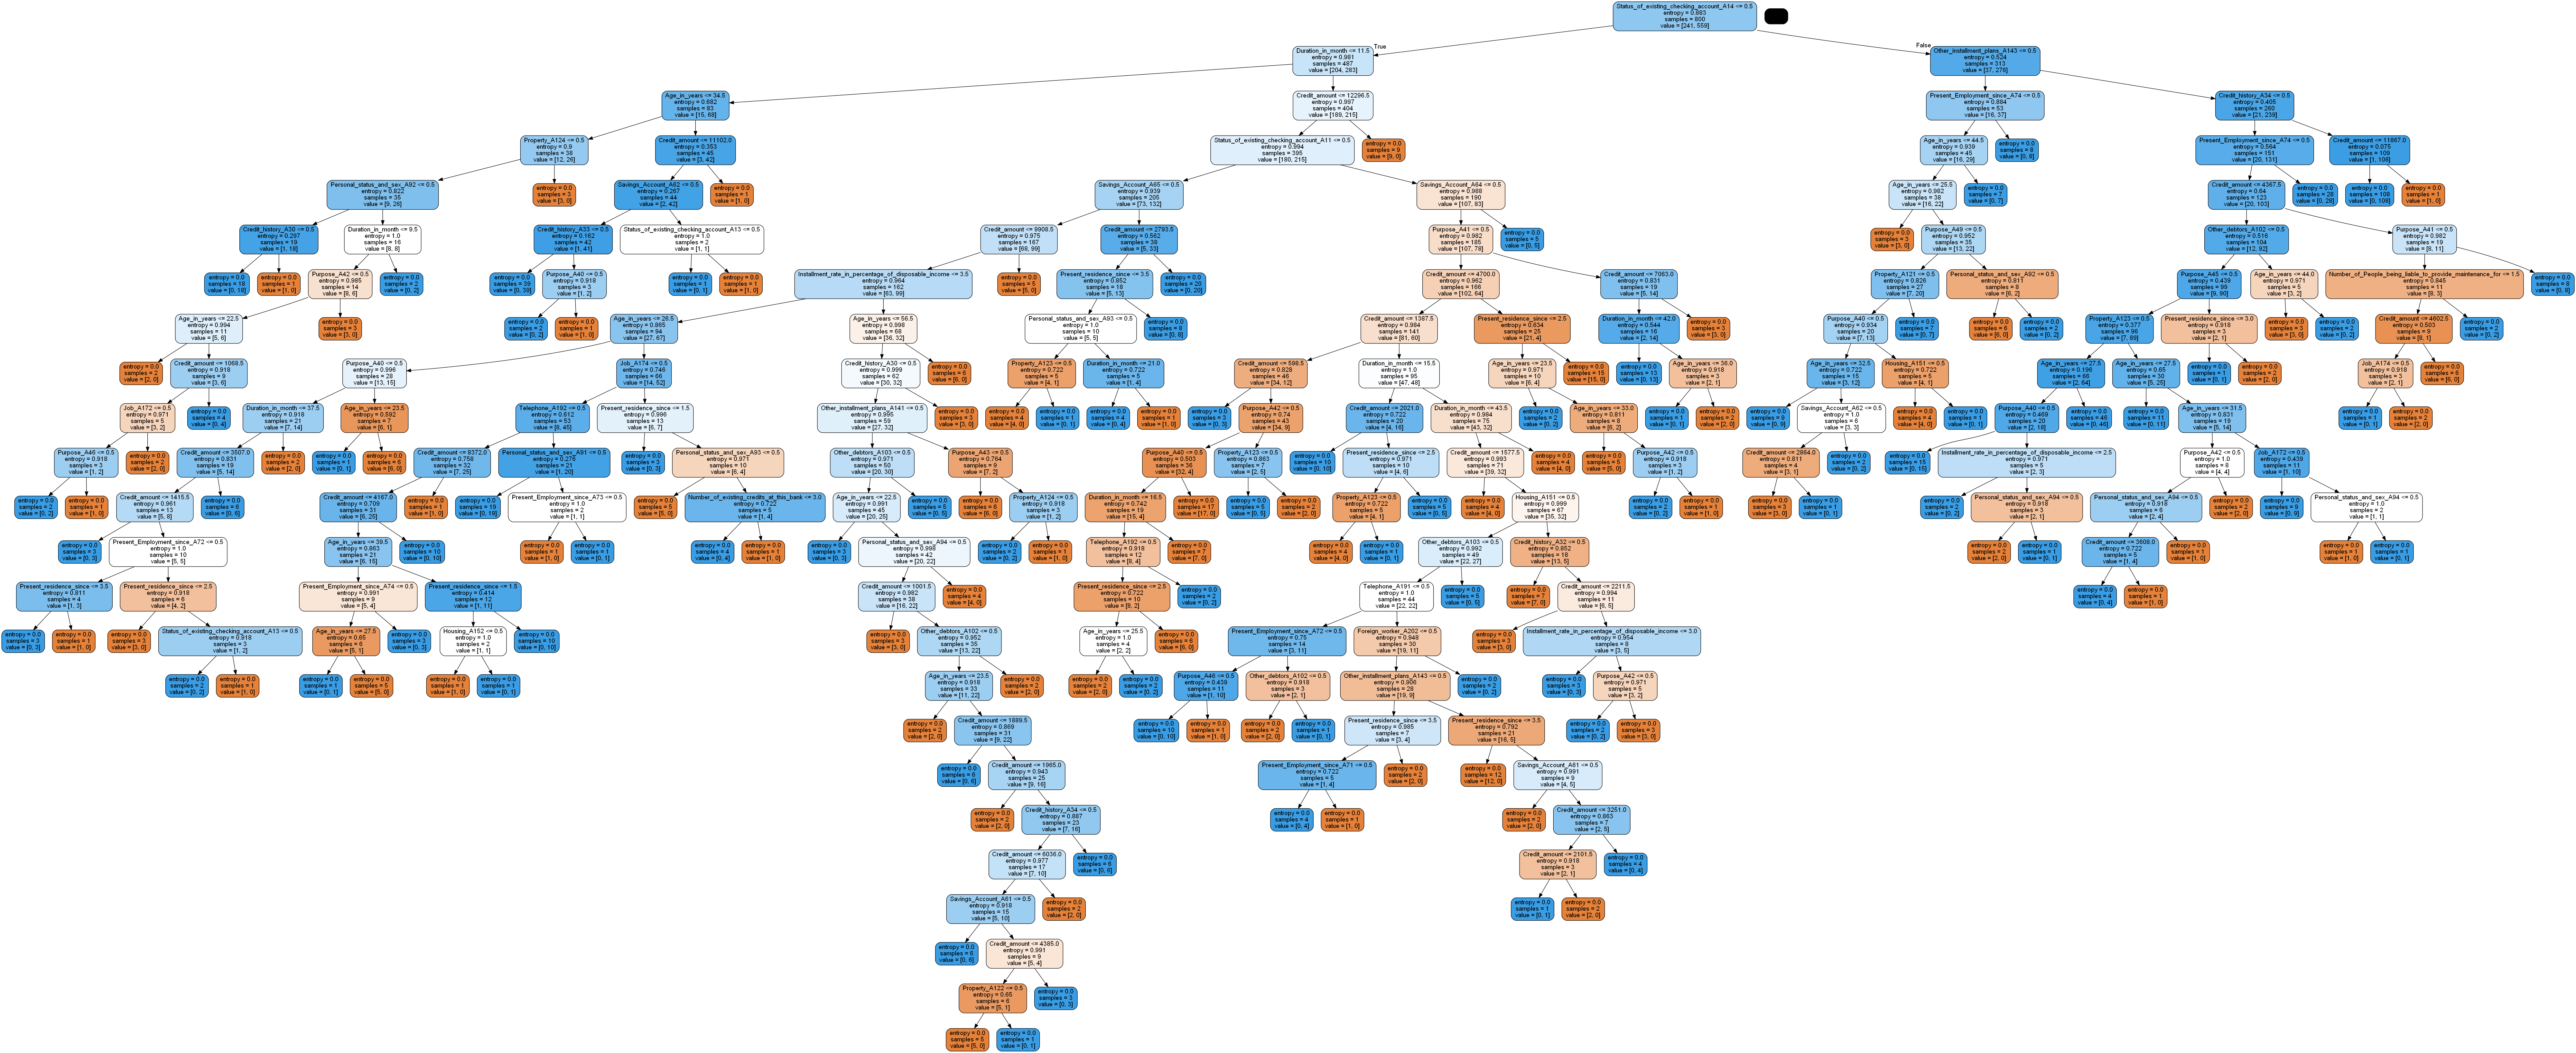

In [58]:
dot_data = StringIO()  
export_graphviz(decclassifier, out_file=dot_data,feature_names= list(X_train_clean),filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_clean, y_train_clean)
# fit, train and cross validate Decision Tree with training and test data 

rfc_pred = rfc.predict(X_test_clean)
print('MAE:', metrics.mean_absolute_error(y_test_clean,rfc_pred))
print('MSE:', metrics.mean_squared_error(y_test_clean,rfc_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_clean,rfc_pred)))
from sklearn.metrics import accuracy_score 

print ("Accuracy : ", accuracy_score(y_test_clean,rfc_pred)*100)


MAE: 0.245
MSE: 0.245
RMSE: 0.4949747468305833
Accuracy :  75.5


In [60]:
#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error  
mean_absolute_error(y_test_clean,rfc_pred) #y_target, y_pred

0.245

In [61]:
# MSE L2 loss - Should be close to 0
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test_clean,rfc_pred) #y_target, y_pred

0.245

In [62]:
print(confusion_matrix(y_test_clean,rfc_pred))

[[ 20  39]
 [ 10 131]]


In [63]:

from sklearn.svm import SVC
svclassifier = SVC(kernel = 'rbf', random_state = 0, gamma='auto')
svclassifier.fit(X_train_clean, y_train_clean)

SVC(gamma='auto', random_state=0)

In [64]:
# Predicting the Test set results
y_pred = svclassifier.predict(X_test_clean)

In [65]:
cm = confusion_matrix(y_test_clean, y_pred)
print(cm)

[[  0  59]
 [  5 136]]


In [66]:
print(classification_report(y_test_clean,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.70      0.96      0.81       141

    accuracy                           0.68       200
   macro avg       0.35      0.48      0.40       200
weighted avg       0.49      0.68      0.57       200



In [67]:

from sklearn.metrics import mean_absolute_error  
mean_absolute_error(y_test_clean,y_pred) #y_target, y_pred

0.32

In [68]:

from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test_clean,y_pred) #y_target, y_pred

0.32

In [69]:
from sklearn.metrics import log_loss
log_loss(y_test_clean,y_pred)

11.052644327613326

In [70]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test_clean,y_pred)*100)

Accuracy :  68.0


In [71]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
knnclassifier.fit(X_train_clean, y_train_clean)

KNeighborsClassifier(n_neighbors=6)

In [72]:
y_pred_knn = knnclassifier.predict(X_test_clean)

In [73]:
# Creating the Confusion Matrix
cm = confusion_matrix(y_test_clean, y_pred_knn)
cm

array([[ 15,  44],
       [ 30, 111]], dtype=int64)

In [74]:
print(classification_report(y_test_clean,y_pred_knn))

              precision    recall  f1-score   support

           0       0.33      0.25      0.29        59
           1       0.72      0.79      0.75       141

    accuracy                           0.63       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.60      0.63      0.61       200



In [75]:
print ("Accuracy : ", accuracy_score(y_test_clean,y_pred_knn)*100)

Accuracy :  63.0


In [76]:

from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X_train_clean_pca = pca.fit_transform(X_train_clean)
X_test_clean_pca = pca.transform(X_test_clean)


from sklearn.svm import SVC
svclassifier1 = SVC(kernel = 'rbf', random_state = 0, gamma='auto')
svclassifier1.fit(X_train_clean_pca, y_train_clean)

y_pred_svm = svclassifier1.predict(X_test_clean_pca)

In [77]:
cm = confusion_matrix(y_test_clean, y_pred_svm)
cm

array([[  0,  59],
       [  0, 141]], dtype=int64)

In [78]:
print(classification_report(y_test_clean,y_pred_knn))

              precision    recall  f1-score   support

           0       0.33      0.25      0.29        59
           1       0.72      0.79      0.75       141

    accuracy                           0.63       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.60      0.63      0.61       200



In [79]:
print('MAE:', metrics.mean_absolute_error(y_test_clean,y_pred_svm))
print('MSE:', metrics.mean_squared_error(y_test_clean,y_pred_svm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_clean,y_pred_svm)))
print ("Accuracy : ", accuracy_score(y_test_clean,y_pred_svm)*100)

MAE: 0.295
MSE: 0.295
RMSE: 0.5431390245600107
Accuracy :  70.5
